In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [98]:
dataset=pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date")

In [99]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [100]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 1/3/2012 to 12/30/2016
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


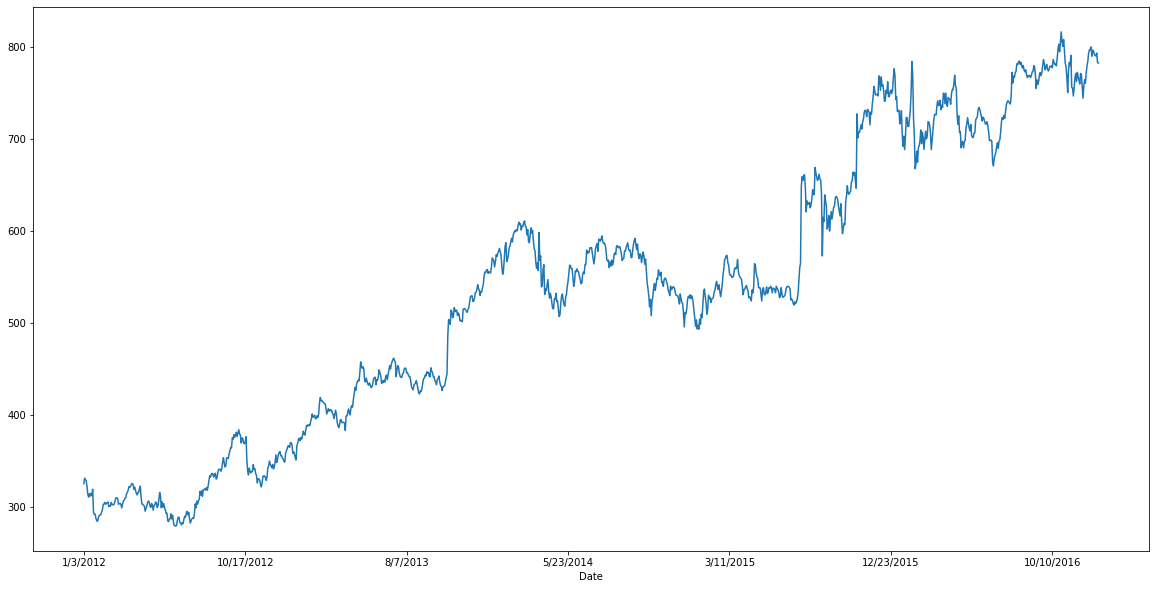

In [102]:
dataset['Open'].plot(figsize=(20,10))

In [103]:
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)


In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 1/3/2012 to 12/30/2016
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null float64
Volume    1258 non-null float64
dtypes: float64(5)
memory usage: 59.0+ KB


In [105]:
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2012,NaN,NaN,NaN,NaN,NaN
1/4/2012,NaN,NaN,NaN,NaN,NaN
1/5/2012,NaN,NaN,NaN,NaN,NaN
1/6/2012,NaN,NaN,NaN,NaN,NaN
1/9/2012,NaN,NaN,NaN,NaN,NaN
1/10/2012,NaN,NaN,NaN,NaN,NaN
1/11/2012,323.002857,325.392857,318.682857,643.132857,7.208100e+06
1/12/2012,321.457143,322.882857,316.841429,638.037143,6.691514e+06
1/13/2012,318.698571,319.801429,314.025714,631.870000,6.531857e+06


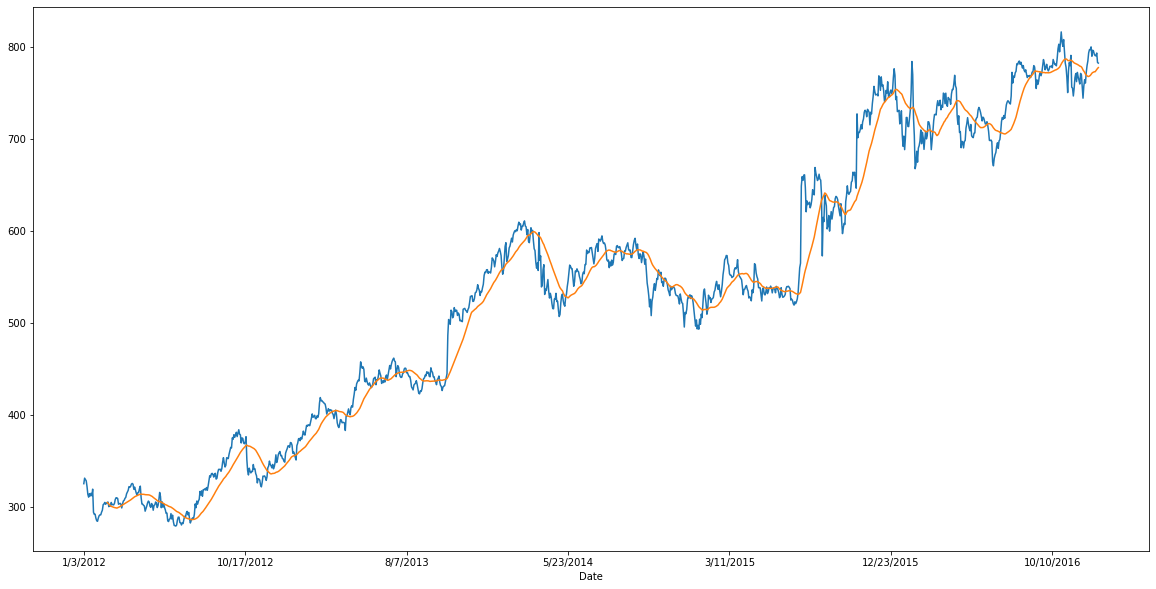

In [111]:
dataset['Open'].plot(figsize=(20,10))
dataset.rolling(30).mean()['Open'].plot()

In [112]:
dataset['Closing 30 day mean']=dataset.rolling(30).mean()['Close']

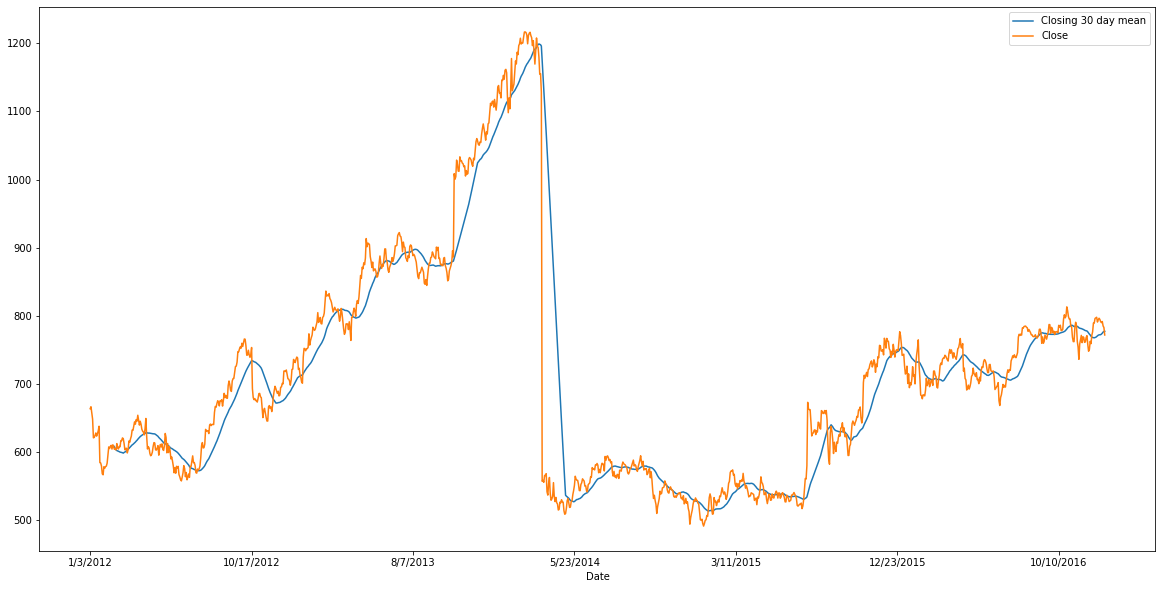

In [115]:
dataset[["Closing 30 day mean","Close"]].plot(figsize=(20,10))
# dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [109]:
training_set=dataset['Open']
training_set = pd.DataFrame(training_set)

training_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 1/3/2012 to 12/30/2016
Data columns (total 1 columns):
Open    1258 non-null float64
dtypes: float64(1)
memory usage: 19.7+ KB


In [116]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [117]:

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [123]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [124]:
model = Sequential()

In [125]:
model.add(LSTM(units=50,return_sequences=True , input_shape=(X_train.shape[1],1)))
# .add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))


In [127]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 6s - loss: 0.0049     
Epoch 2/100
1198/1198 [==============================] - 4s - loss: 0.0042     
Epoch 3/100
1198/1198 [==============================] - 4s - loss: 0.0041     
Epoch 4/100
1198/1198 [==============================] - 4s - loss: 0.0034     
Epoch 5/100
1198/1198 [==============================] - 4s - loss: 0.0035     
Epoch 6/100
1198/1198 [==============================] - 4s - loss: 0.0036     
Epoch 7/100
1198/1198 [==============================] - 4s - loss: 0.0036     
Epoch 8/100
1198/1198 [==============================] - 4s - loss: 0.0033     
Epoch 9/100
1198/1198 [==============================] - 4s - loss: 0.0030     
Epoch 10/100
1198/1198 [==============================] - 4s - loss: 0.0031     
Epoch 11/100
1198/1198 [==============================] - 4s - loss: 0.0038     
Epoch 12/100
1198/1198 [==============================] - 4s - loss: 0.0029     
Epoch 13/100
1198/1198 [=============

In [128]:
test_dataset=pd.read_csv('Google_Stock_Price_Test.csv',index_col='Date')

In [129]:
test_dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [130]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1/3/2017 to 1/31/2017
Data columns (total 5 columns):
Open      20 non-null float64
High      20 non-null float64
Low       20 non-null float64
Close     20 non-null float64
Volume    20 non-null object
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [131]:
test_dataset['Volume'] = test_dataset['Volume'].str.replace(',','').astype(float)

In [132]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1/3/2017 to 1/31/2017
Data columns (total 5 columns):
Open      20 non-null float64
High      20 non-null float64
Low       20 non-null float64
Close     20 non-null float64
Volume    20 non-null float64
dtypes: float64(5)
memory usage: 960.0+ bytes


In [133]:
real_stock_price =  test_dataset.iloc[:,1:2].values


In [134]:
test_input = test_dataset['Open']
test_input = pd.DataFrame(test_input)

In [135]:
test_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1/3/2017 to 1/31/2017
Data columns (total 1 columns):
Open    20 non-null float64
dtypes: float64(1)
memory usage: 320.0+ bytes


In [136]:
dataset_total=pd.concat((dataset['Open'],test_dataset['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_dataset)-60:].values
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)
# print(len(inputs))
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [137]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
0    20 non-null float32
dtypes: float32(1)
memory usage: 160.0 bytes


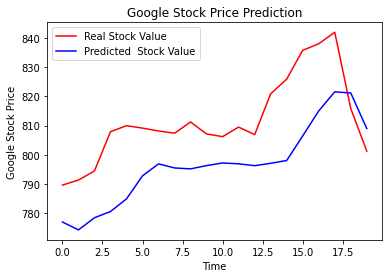

In [138]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Value')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted  Stock Value')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()